In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

In [2]:
cancer_data = pd.read_csv("E:/AMS Docs/Courses/Guvi/Data Science/Projects/05_ML_Projects_Final/Ensemble_RF/Breast Cancer Prediction/cancer.csv")
cancer_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
cancer_data.drop(columns="Unnamed: 32",inplace=True)

In [4]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# 'M' - Malignant - Has Cancer ; 'B' - Benign - No Cancer
cancer_data["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [6]:
x = cancer_data.drop(columns=['id','diagnosis'])
y = cancer_data["diagnosis"]

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y)
print(x_train.shape)
print(x_test.shape)

(426, 30)
(143, 30)


DECISION TREE CLASSIFIER

In [8]:
# Training the Model
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [9]:
# y_train_pred ==> used for comparison
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

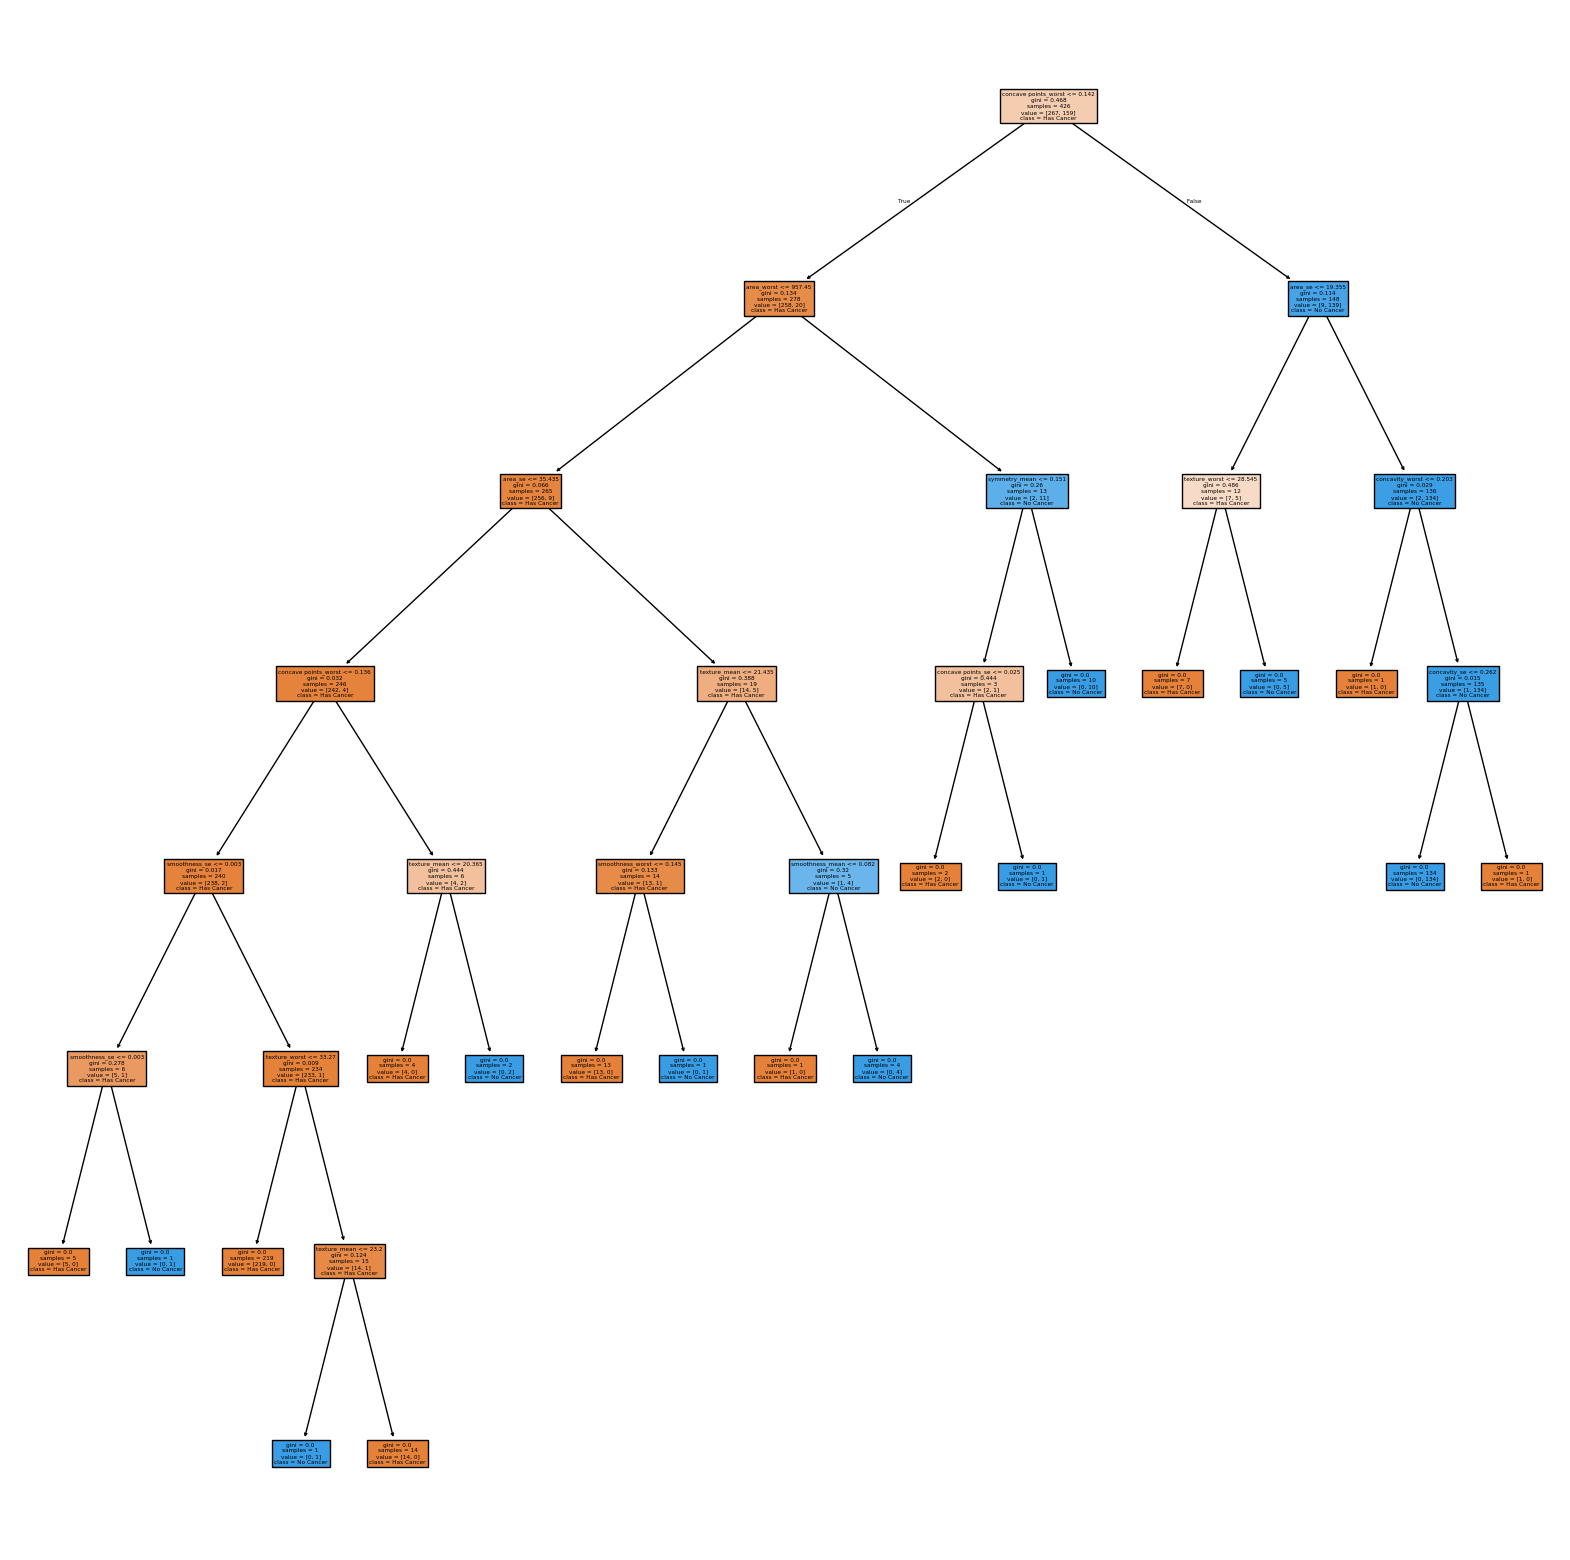

In [10]:
plt.figure(figsize=(20,20))
features = x.columns
classes = ['Has Cancer','No Cancer']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

Train score 1.0
Test score 0.9370629370629371
Train Confusion matrix


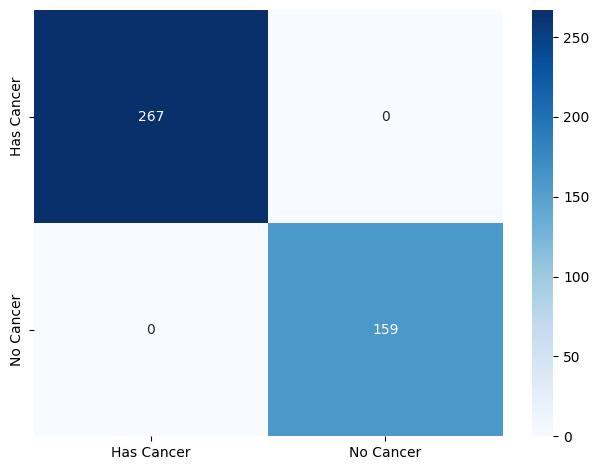

Test Confusion matrix


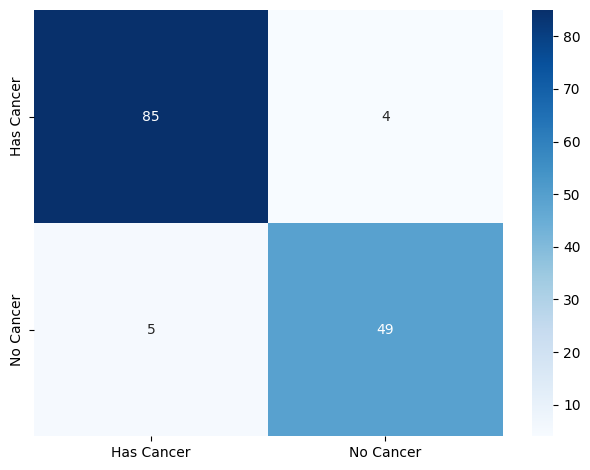

In [11]:
# Confusion Matrix & Accuracy -- Test Data compared with Train Data
def plot_confusionmatrix(y_pred,y,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_pred,y)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

GRID SEARCH CV

In [12]:
# Grid Search CV
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

DecisionTreeClassifier(max_depth=4, min_samples_split=3)
Train score 0.9859154929577465
Test score 0.9370629370629371
Train Confusion matrix


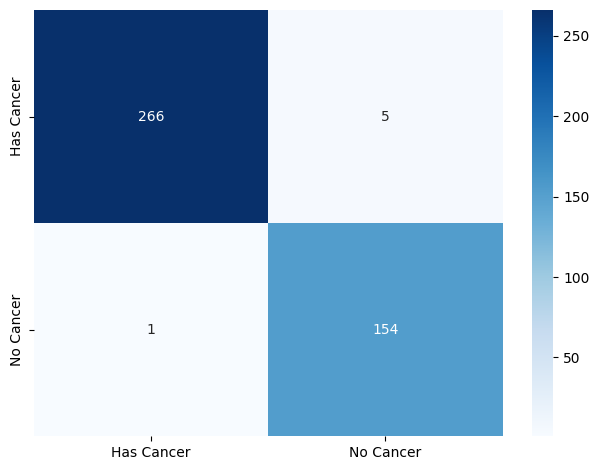

Test Confusion matrix


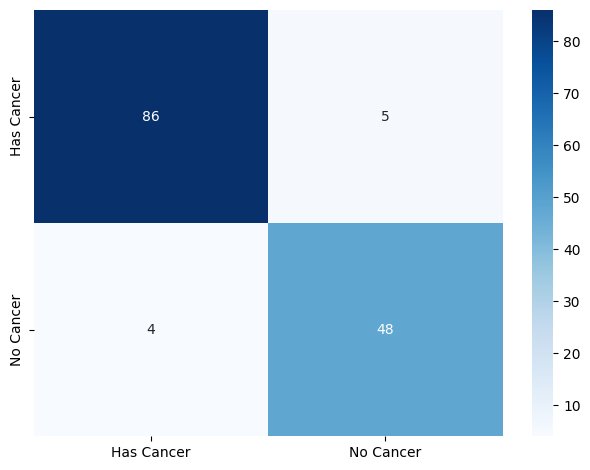

In [13]:
# Identifying Best Parameter and training the model again
model = gcv.best_estimator_
print(gcv.best_estimator_)
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

RANDOM FOREST

In [14]:
# Splitting the Data 
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [15]:
# instantiate the classifier
rfc = RandomForestClassifier(n_estimators=10,random_state=0)  
# fit the model
rfc.fit(X_train, Y_train)
# Predict the Test set results
Y_pred = rfc.predict(X_test)
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(Y_test, Y_pred)))

Model accuracy score with 10 decision-trees : 0.9468


In [16]:
# instantiate the classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators => number of Decision Tree taken into consideration  
# fit the model
rfc.fit(X_train, Y_train)
# Predict the Test set results
Y_pred = rfc.predict(X_test)
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(Y_test, Y_pred)))

Model accuracy score with 100 decision-trees : 0.9628


In [17]:
import pickle

In [18]:
# Save the model to a file
with open('cancer_classifier.pkl', 'wb') as file:
    pickle.dump(rfc, file)

In [19]:
# Load the model from the file
with open('cancer_classifier.pkl', 'rb') as file:
    loaded_rfc = pickle.load(file)

In [20]:
Y_pred = loaded_rfc.predict(X_test)

In [21]:
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(Y_test, Y_pred)))

Model accuracy score with 100 decision-trees : 0.9628


In [24]:
import numpy as np
user_data = np.array([[20, 17, 132, 136, 0.08, 0.07, 0.086, 0.07, 0.18, 0.05, 0.54, 0.73, 3.39, 74.08, 0.005, 0.01, 0.01, 0.01, 0.01, 0.003, 24.99, 23.41, 158.8, 1956, 0.12, 0.08, 0.08, 0.08, 0.15, 0.08]])
pred_user_data = loaded_rfc.predict(user_data)
print("Status :",pred_user_data[0])

Status : M


/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


FEATURE IMPORTANCE

In [ ]:
# view the feature scores
# Sort the feature columns based on its importance
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False) 
feature_scores

concave points_worst       0.140608
concave points_mean        0.132638
area_worst                 0.125211
concavity_mean             0.088845
perimeter_worst            0.083761
radius_worst               0.047649
radius_mean                0.046295
perimeter_mean             0.044979
area_se                    0.039836
area_mean                  0.039784
concavity_worst            0.031618
compactness_worst          0.019798
radius_se                  0.019573
texture_worst              0.015630
symmetry_worst             0.014870
texture_mean               0.012876
compactness_mean           0.012574
perimeter_se               0.011933
smoothness_worst           0.010355
smoothness_se              0.009875
concavity_se               0.008994
fractal_dimension_mean     0.006518
fractal_dimension_se       0.005896
compactness_se             0.005428
symmetry_se                0.005102
concave points_se          0.004888
smoothness_mean            0.004612
fractal_dimension_worst    0

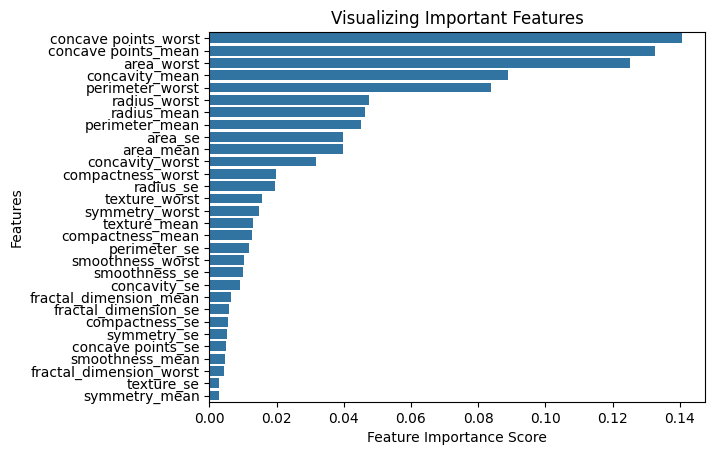

In [ ]:
# Visualizing the Feature importance with Bar chart
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")

# Visualize the graph
plt.show()